<a href="https://colab.research.google.com/github/frontloss/iNeuron-assignments/blob/master/Data_Visualization_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets

### Load Dataset

In [2]:
data = datasets.load_iris()
iris_df = pd.DataFrame(data = data['data'], columns = data['feature_names'])

### View Dataset

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#Reducing above 4 features into linearly combined 3 features through Principal Component Analysis Reduction 
pca = PCA(3)
X = pca.fit_transform(data['data'])

In [5]:
pca_iris_df = pd.DataFrame(data = np.hstack([X,np.expand_dims(data.target,axis=1)]), columns = ['PCA1','PCA2','PCA3','target'])
pca_iris_df['target'] = pca_iris_df['target'].astype(int)
pca_iris_df['target'] = pca_iris_df['target'].apply(lambda x:data.target_names[x])

In [6]:
pca_iris_df.head()

,PCA1,PCA2,PCA3,target
0,-2.684126,0.319397,-0.027915,setosa
1,-2.714142,-0.177001,-0.210464,setosa
2,-2.888991,-0.144949,0.017900,setosa
3,-2.745343,-0.318299,0.031559,setosa
4,-2.728717,0.326755,0.090079,setosa


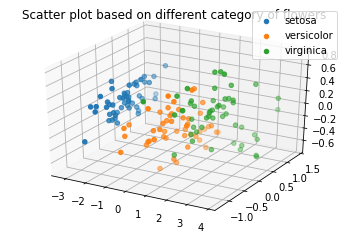

In [7]:
ax = plt.axes(projection='3d')
plt.title('Scatter plot based on different category of flowers')
for species in data.target_names: 
    df = pca_iris_df[pca_iris_df['target']==species]
    ax.scatter3D(df['PCA1'],df['PCA2'],df['PCA3'])
    plt.legend(data.target_names)